# 2014222 - Semester 2 CA-02 -May 2024

### Github account

https://github.com/2014222-student-cct-ie/2024--Semester-2--CA2/

# Part 2

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.sql.types import FloatType

# Performing time series decomposition (statsmodels). 
from statsmodels.tsa.seasonal import seasonal_decompose

# For normalization
from pyspark.ml.feature import MinMaxScaler 
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


# process the tweets data
# !pip install textblob
from pyspark.sql.functions import udf
from textblob import TextBlob

# pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from pyspark.sql import DataFrame

# re module provides regular expression support.
# In Python a regular expression search is typically written as:
# match = re. search(pat, str)
# The re.search() method takes a regular expression pattern and a string and searches
# for that pattern within the string.

import re

from pyspark.sql.types import StructType, StructField, IntegerType, StringType

!pip install --upgrade pandas

#!pip install pyspark

#!pip install pyspark pandas

# Import the warnings module

import warnings

# Ignore all warnings by applying th the 'filterwarnings()'' function and passing the 'ignore' argument

warnings.filterwarnings('ignore')

/Users/geomarmunoz/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Note

I did the sentiment analysis usign Pyspark. However, when I tried to export the results to a CSV it crashes after.

Therefore I will do the sentiment analysis again **this time using pandas**, but using this time cleaned_tweet_dataset.csv where all the tweets are cleaned (no @ mentions, hashtags, retweets, hyperlinks, and colons, emojis, unicode characters from a string, emoticons, dingbats, symbols & pictographs, transport & map symbols, flags (iOS), Chinese characters, etc.)

The error is captured in an image in part 1

In [2]:
# Read the CSV file by applying the pd.read_csv() function.

tweets_dataset = pd.read_csv('cleaned_tweet_dataset.csv')

In [3]:
# Print the tweets_dataset

tweets_dataset

,tweet_ID,date_timestamp,twitter_user,cleaned_tweet_text,month
0,1467810369,04-06-2009 22:19:45,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi...",2009-06
1,1467810672,04-06-2009 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,2009-06
2,1467810917,04-06-2009 22:19:53,mattycus,I dived many times for the ball. Managed to sa...,2009-06
3,1467811184,04-06-2009 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,2009-06
4,1467811193,04-06-2009 22:19:57,Karoli,"no, it's not behaving at all. i'm mad. why am ...",2009-06
...,...,...,...,...,...
638474,2072531933,06-07-2009 21:12:35,Neo_drone,Apparetly they just started filming so imma go...,2009-07
638475,2072531954,06-07-2009 21:12:35,edenhig,I would just like to say thank you from all of...,2009-07
638476,2072532046,06-07-2009 21:12:36,Gotjuicygirl,thanx love ! I definitely agree,2009-07
638477,2072532066,06-07-2009 21:12:36,whitet,"the ones from yesterday w/ the animals, VERY CUTE",2009-07


In [4]:
# Print the first 10 rows of the tweets dataframe by applying the .head() method,
# This method is will display the top 5 observations of the dataset

tweets_dataset.head(10)

,tweet_ID,date_timestamp,twitter_user,cleaned_tweet_text,month
0,1467810369,04-06-2009 22:19:45,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi...",2009-06
1,1467810672,04-06-2009 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,2009-06
2,1467810917,04-06-2009 22:19:53,mattycus,I dived many times for the ball. Managed to sa...,2009-06
3,1467811184,04-06-2009 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,2009-06
4,1467811193,04-06-2009 22:19:57,Karoli,"no, it's not behaving at all. i'm mad. why am ...",2009-06
5,1467811372,04-06-2009 22:20:00,joy_wolf,not the whole crew,2009-06
6,1467811592,04-06-2009 22:20:03,mybirch,Need a hug,2009-06
7,1467811594,04-06-2009 22:20:03,coZZ,"hey long time no see! Yes.. Rains a bit ,only...",2009-06
8,1467811795,04-06-2009 22:20:05,2Hood4Hollywood,nope they didn't have it,2009-06
9,1467812025,04-06-2009 22:20:09,mimismo,que me muera ?,2009-06


In [5]:
# Getting information about the tweets dataframe by applying the .info() method,
# Will display number of records in each column, data having null or not null, Data type,
# memory usage of the dataset
# helps to understand the data type and information about data

tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638479 entries, 0 to 638478
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   tweet_ID            638479 non-null  int64 
 1   date_timestamp      638479 non-null  object
 2   twitter_user        638479 non-null  object
 3   cleaned_tweet_text  637286 non-null  object
 4   month               638479 non-null  object
dtypes: int64(1), object(4)
memory usage: 24.4+ MB


# TextBlob Sentiment Analysis

In [6]:
# Ensure the tweet text column is string

tweets_dataset['cleaned_tweet_text'] = tweets_dataset['cleaned_tweet_text'].astype(str)

# Define the sentiment analysis function with error handling

def analyze_sentiment(text):
    if isinstance(text, str) and text.strip():
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return None

In [7]:
# Apply sentiment analysis

tweets_dataset['score_TextBlob'] = tweets_dataset['cleaned_tweet_text'].apply(analyze_sentiment)

In [8]:
# Display results

tweets_dataset[['cleaned_tweet_text', 'score_TextBlob']].head(10)

,cleaned_tweet_text,score_TextBlob
0,"- Awww, that's a bummer. You shoulda got Davi...",0.216667
1,is upset that he can't update his Facebook by ...,0.000000
2,I dived many times for the ball. Managed to sa...,0.500000
3,my whole body feels itchy and like its on fire,0.200000
4,"no, it's not behaving at all. i'm mad. why am ...",-0.625000
5,not the whole crew,0.200000
6,Need a hug,0.000000
7,"hey long time no see! Yes.. Rains a bit ,only...",0.270833
8,nope they didn't have it,0.000000
9,que me muera ?,0.000000


# Vader Sentiment Analysis

In [9]:
# Ensure VADER lexicon is downloaded

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/geomarmunoz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# Initialize VADER sentiment analyzer

sid = SentimentIntensityAnalyzer()

In [11]:
# Function to calculate VADER sentiment

def get_vader_sentiment(text):
    if pd.isna(text):
        return 0  # Handle missing values by returning a neutral score
    scores = sid.polarity_scores(text)
    return scores['compound']

In [12]:
# Apply the function to calculate sentiment

tweets_dataset['score_Vader'] = tweets_dataset['cleaned_tweet_text'].apply(get_vader_sentiment)

In [13]:
# Display columns

tweets_dataset[['cleaned_tweet_text', 'score_Vader']].head(10)

,cleaned_tweet_text,score_Vader
0,"- Awww, that's a bummer. You shoulda got Davi...",-0.0173
1,is upset that he can't update his Facebook by ...,-0.7500
2,I dived many times for the ball. Managed to sa...,0.4939
3,my whole body feels itchy and like its on fire,-0.2500
4,"no, it's not behaving at all. i'm mad. why am ...",-0.6597
5,not the whole crew,0.0000
6,Need a hug,0.4767
7,"hey long time no see! Yes.. Rains a bit ,only...",0.7450
8,nope they didn't have it,0.0000
9,que me muera ?,0.0000


In [14]:
# Display columns

tweets_dataset[['cleaned_tweet_text', 'score_TextBlob', 'score_Vader']].head(10)

,cleaned_tweet_text,score_TextBlob,score_Vader
0,"- Awww, that's a bummer. You shoulda got Davi...",0.216667,-0.0173
1,is upset that he can't update his Facebook by ...,0.000000,-0.7500
2,I dived many times for the ball. Managed to sa...,0.500000,0.4939
3,my whole body feels itchy and like its on fire,0.200000,-0.2500
4,"no, it's not behaving at all. i'm mad. why am ...",-0.625000,-0.6597
5,not the whole crew,0.200000,0.0000
6,Need a hug,0.000000,0.4767
7,"hey long time no see! Yes.. Rains a bit ,only...",0.270833,0.7450
8,nope they didn't have it,0.000000,0.0000
9,que me muera ?,0.000000,0.0000


In [15]:
# Initialize VADER sentiment analyzer

sid = SentimentIntensityAnalyzer()

In [16]:
# Define a Function to Determine Sentiment Connotation

def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER to each tweet and create a new column for sentiment scores

tweets_dataset['compound'] = tweets_dataset['cleaned_tweet_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [17]:
# Apply the Sentiment Label Function

tweets_dataset['sentiment'] = tweets_dataset['compound'].apply(sentiment_label)

In [18]:
# Display the DataFrame with the sentiment labels

print(tweets_dataset[['cleaned_tweet_text', 'sentiment']])

                                       cleaned_tweet_text sentiment
0       - Awww, that's a bummer.  You shoulda got Davi...  Negative
1       is upset that he can't update his Facebook by ...  Negative
2       I dived many times for the ball. Managed to sa...  Positive
3          my whole body feels itchy and like its on fire  Negative
4       no, it's not behaving at all. i'm mad. why am ...  Negative
...                                                   ...       ...
638474  Apparetly they just started filming so imma go...   Neutral
638475  I would just like to say thank you from all of...  Positive
638476                    thanx love ! I definitely agree  Positive
638477  the ones from yesterday w/ the animals, VERY CUTE  Positive
638478  hey Andrea, how are you? This is my new twitte...  Positive

[638479 rows x 2 columns]


In [19]:
# Display columns

tweets_dataset[['cleaned_tweet_text', 'score_TextBlob', 'score_Vader', 'sentiment']].head(31)

,cleaned_tweet_text,score_TextBlob,score_Vader,sentiment
0,"- Awww, that's a bummer. You shoulda got Davi...",0.216667,-0.0173,Negative
1,is upset that he can't update his Facebook by ...,0.000000,-0.7500,Negative
2,I dived many times for the ball. Managed to sa...,0.500000,0.4939,Positive
3,my whole body feels itchy and like its on fire,0.200000,-0.2500,Negative
4,"no, it's not behaving at all. i'm mad. why am ...",-0.625000,-0.6597,Negative
5,not the whole crew,0.200000,0.0000,Neutral
6,Need a hug,0.000000,0.4767,Positive
7,"hey long time no see! Yes.. Rains a bit ,only...",0.270833,0.7450,Positive
8,nope they didn't have it,0.000000,0.0000,Neutral
9,que me muera ?,0.000000,0.0000,Neutral


In [20]:
# Check the information again

tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638479 entries, 0 to 638478
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tweet_ID            638479 non-null  int64  
 1   date_timestamp      638479 non-null  object 
 2   twitter_user        638479 non-null  object 
 3   cleaned_tweet_text  638479 non-null  object 
 4   month               638479 non-null  object 
 5   score_TextBlob      638479 non-null  float64
 6   score_Vader         638479 non-null  float64
 7   compound            638479 non-null  float64
 8   sentiment           638479 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 43.8+ MB


In [21]:
# Sentiment analysis functions

def get_vader_sentiment(text):
    if pd.isna(text):
        return 0
    return sid.polarity_scores(text)['compound']

def get_textblob_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(text).sentiment.polarity

def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis and label sentiments

tweets_dataset['vader_score'] = tweets_dataset['cleaned_tweet_text'].apply(get_vader_sentiment)
tweets_dataset['textblob_score'] = tweets_dataset['cleaned_tweet_text'].apply(get_textblob_sentiment)
tweets_dataset['vader_sentiment'] = tweets_dataset['vader_score'].apply(label_sentiment)
tweets_dataset['textblob_sentiment'] = tweets_dataset['textblob_score'].apply(label_sentiment)

In [22]:
# Display the dataset

tweets_dataset

,tweet_ID,date_timestamp,twitter_user,cleaned_tweet_text,month,score_TextBlob,score_Vader,compound,sentiment,vader_score,textblob_score,vader_sentiment,textblob_sentiment
0,1467810369,04-06-2009 22:19:45,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi...",2009-06,0.216667,-0.0173,-0.0173,Negative,-0.0173,0.216667,Negative,Positive
1,1467810672,04-06-2009 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,2009-06,0.000000,-0.7500,-0.7500,Negative,-0.7500,0.000000,Negative,Neutral
2,1467810917,04-06-2009 22:19:53,mattycus,I dived many times for the ball. Managed to sa...,2009-06,0.500000,0.4939,0.4939,Positive,0.4939,0.500000,Positive,Positive
3,1467811184,04-06-2009 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,2009-06,0.200000,-0.2500,-0.2500,Negative,-0.2500,0.200000,Negative,Positive
4,1467811193,04-06-2009 22:19:57,Karoli,"no, it's not behaving at all. i'm mad. why am ...",2009-06,-0.625000,-0.6597,-0.6597,Negative,-0.6597,-0.625000,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638474,2072531933,06-07-2009 21:12:35,Neo_drone,Apparetly they just started filming so imma go...,2009-07,0.000000,0.0000,0.0000,Neutral,0.0000,0.000000,Neutral,Neutral
638475,2072531954,06-07-2009 21:12:35,edenhig,I would just like to say thank you from all of...,2009-07,0.000000,0.6124,0.6124,Positive,0.6124,0.000000,Positive,Neutral
638476,2072532046,06-07-2009 21:12:36,Gotjuicygirl,thanx love ! I definitely agree,2009-07,0.312500,0.8655,0.8655,Positive,0.8655,0.312500,Positive,Positive
638477,2072532066,06-07-2009 21:12:36,whitet,"the ones from yesterday w/ the animals, VERY CUTE",2009-07,0.650000,0.6965,0.6965,Positive,0.6965,0.650000,Positive,Positive


In [23]:
# Display columns

tweets_dataset[['cleaned_tweet_text', 'score_TextBlob', 'score_Vader', 'vader_sentiment', 'textblob_sentiment']]

,cleaned_tweet_text,score_TextBlob,score_Vader,vader_sentiment,textblob_sentiment
0,"- Awww, that's a bummer. You shoulda got Davi...",0.216667,-0.0173,Negative,Positive
1,is upset that he can't update his Facebook by ...,0.000000,-0.7500,Negative,Neutral
2,I dived many times for the ball. Managed to sa...,0.500000,0.4939,Positive,Positive
3,my whole body feels itchy and like its on fire,0.200000,-0.2500,Negative,Positive
4,"no, it's not behaving at all. i'm mad. why am ...",-0.625000,-0.6597,Negative,Negative
...,...,...,...,...,...
638474,Apparetly they just started filming so imma go...,0.000000,0.0000,Neutral,Neutral
638475,I would just like to say thank you from all of...,0.000000,0.6124,Positive,Neutral
638476,thanx love ! I definitely agree,0.312500,0.8655,Positive,Positive
638477,"the ones from yesterday w/ the animals, VERY CUTE",0.650000,0.6965,Positive,Positive


In [24]:
# Drop the column called 'Index'

tweets_dataset = tweets_dataset.drop(columns=['score_TextBlob', 'score_Vader', 'compound', 'sentiment'])

In [25]:
# Display the dataset

tweets_dataset

,tweet_ID,date_timestamp,twitter_user,cleaned_tweet_text,month,vader_score,textblob_score,vader_sentiment,textblob_sentiment
0,1467810369,04-06-2009 22:19:45,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi...",2009-06,-0.0173,0.216667,Negative,Positive
1,1467810672,04-06-2009 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,2009-06,-0.7500,0.000000,Negative,Neutral
2,1467810917,04-06-2009 22:19:53,mattycus,I dived many times for the ball. Managed to sa...,2009-06,0.4939,0.500000,Positive,Positive
3,1467811184,04-06-2009 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,2009-06,-0.2500,0.200000,Negative,Positive
4,1467811193,04-06-2009 22:19:57,Karoli,"no, it's not behaving at all. i'm mad. why am ...",2009-06,-0.6597,-0.625000,Negative,Negative
...,...,...,...,...,...,...,...,...,...
638474,2072531933,06-07-2009 21:12:35,Neo_drone,Apparetly they just started filming so imma go...,2009-07,0.0000,0.000000,Neutral,Neutral
638475,2072531954,06-07-2009 21:12:35,edenhig,I would just like to say thank you from all of...,2009-07,0.6124,0.000000,Positive,Neutral
638476,2072532046,06-07-2009 21:12:36,Gotjuicygirl,thanx love ! I definitely agree,2009-07,0.8655,0.312500,Positive,Positive
638477,2072532066,06-07-2009 21:12:36,whitet,"the ones from yesterday w/ the animals, VERY CUTE",2009-07,0.6965,0.650000,Positive,Positive


In [26]:
#tweets_dataset.to_csv('sentiment_score_and_labeled_tweets.csv', index=False)

<Figure size 1000x600 with 0 Axes>

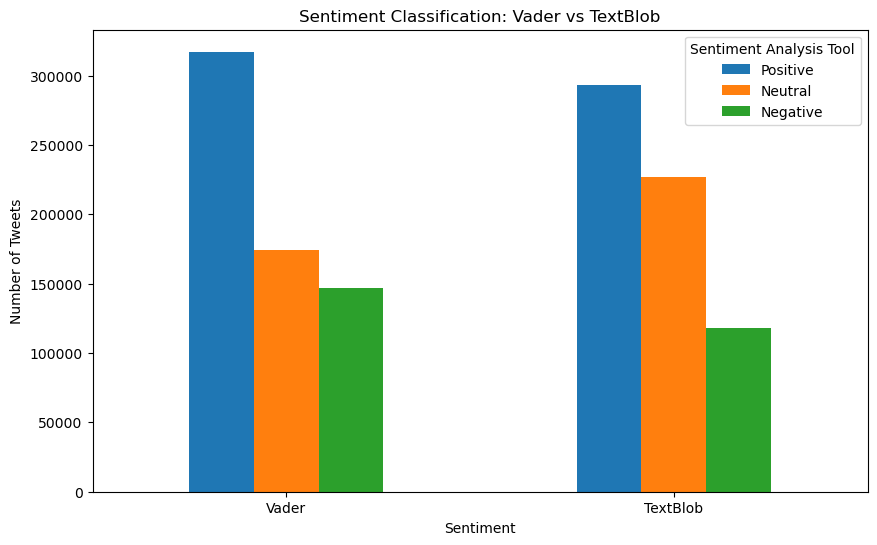

In [27]:
# Plotting the sentiment classifications from Vader and TextBlob
plt.figure(figsize=(10, 6))

# Count the occurrences of each sentiment category for both Vader and TextBlob
vader_counts = tweets_dataset['vader_sentiment'].value_counts()
textblob_counts = tweets_dataset['textblob_sentiment'].value_counts()

# Create a DataFrame for easier plotting
sentiment_counts = pd.DataFrame({
    'Vader': vader_counts,
    'TextBlob': textblob_counts
}).T

# Plot the sentiment counts
sentiment_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title("Sentiment Classification: Vader vs TextBlob")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.legend(title='Sentiment Analysis Tool')
plt.show()


The bar graph shows the number of tweets classified into Positive, Neutral, and Negative categories by two sentiment analysis tools: Vader and TextBlob.

**Positive Sentiment:**
Vader classified approximately 320,000 tweets as Positive.
TextBlob classified around 280,000 tweets as Positive.
Vader tends to classify more tweets as positive compared to TextBlob.

**Neutral Sentiment:**
TextBlob classified about 190,000 tweets as Neutral.
Vader classified around 160,000 tweets as Neutral.
TextBlob shows a higher number of Neutral classifications, indicating it might be more conservative in assigning strong sentiment.

**Negative Sentiment:**
Both Vader and TextBlob classified fewer tweets as Negative compared to Positive and Neutral categories.
Vader classified around 140,000 tweets as Negative.
TextBlob classified approximately 90,000 tweets as Negative.
Vader has a higher count of Negative sentiment classifications compared to TextBlob.

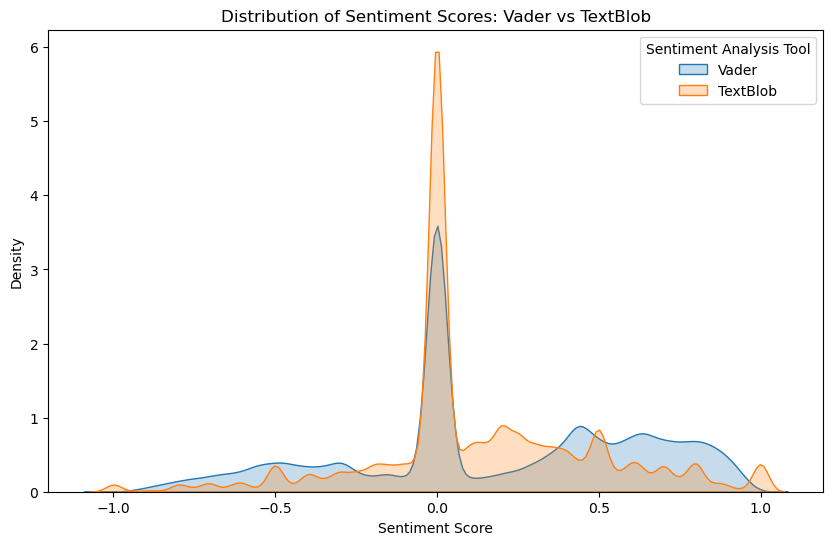

In [28]:
# Plotting the distribution of Vader and TextBlob sentiment scores

plt.figure(figsize=(10, 6))

# KDE plot for Vader scores

sns.kdeplot(data=tweets_dataset, x='vader_score', label="Vader", shade=True)

# KDE plot for TextBlob scores

sns.kdeplot(data=tweets_dataset, x='textblob_score', label="TextBlob", shade=True)

# Adding titles and labels

plt.title("Distribution of Sentiment Scores: Vader vs TextBlob")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend(title='Sentiment Analysis Tool')
plt.show()


Interpretation of Neutral Scores:

The sharp peak in **TextBlob** at 0.0 indicates it may have a bias towards categorizing tweets as neutral.

**Vader’s** broader peak suggests it might provide a more nuanced analysis around the neutral sentiment.

In summary, **Vader** seems to offer a more nuanced sentiment analysis, recognizing a broader range of sentiments, while TextBlob tends to classify a significant portion of the tweets as exactly neutral, potentially overlooking subtle differences in sentiment.

## Additive Decomposition: Trend and Seasonal Components

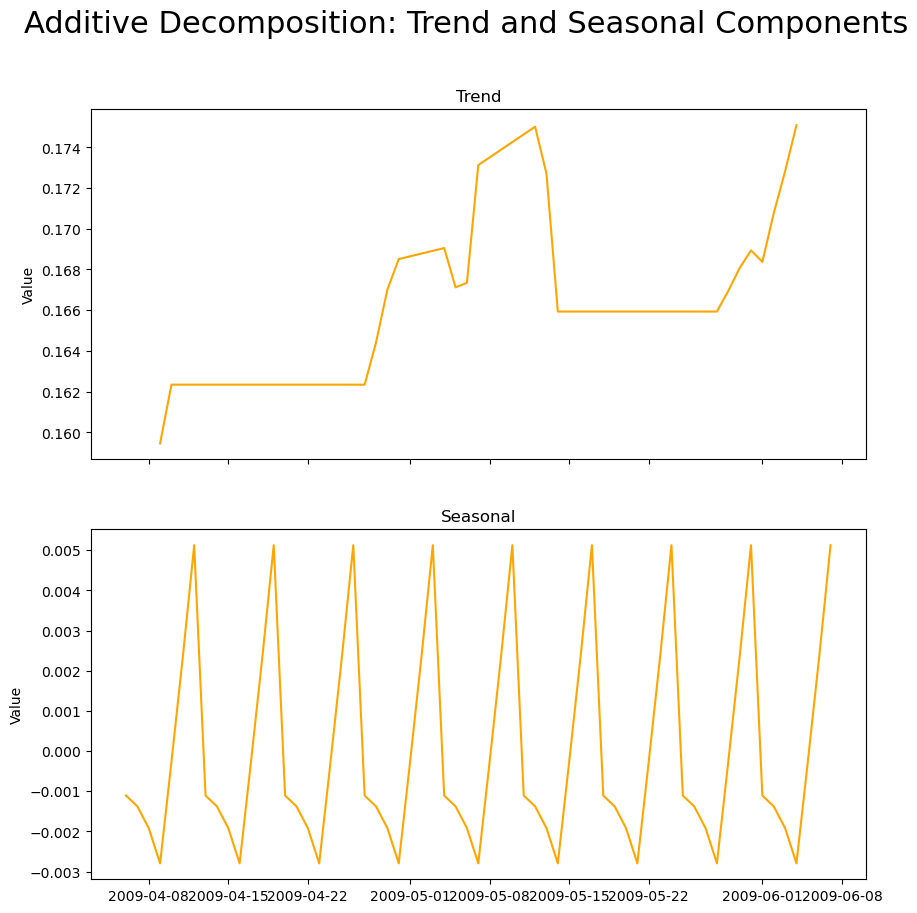

In [29]:
# Drop the "month" and "day" columns if they exist
if 'month' in tweets_dataset.columns and 'day' in tweets_dataset.columns:
    tweets_dataset.drop(["month", "day"], axis=1, inplace=True)

# Ensure the dataset is indexed by date for time series analysis
tweets_dataset['date_timestamp'] = pd.to_datetime(tweets_dataset['date_timestamp'])
tweets_dataset.set_index('date_timestamp', inplace=True)

# Resample data if necessary (e.g., daily mean)
daily_data = tweets_dataset['vader_score'].resample('D').mean().fillna(method='ffill')

# Perform Additive Decomposition
result_add = seasonal_decompose(daily_data, model='additive')

# Plot only the trend and seasonal components with orange color
plt.rcParams.update({'figure.figsize': (10, 10)})
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot trend component
ax1.plot(result_add.trend, color='orange')
ax1.set_title('Trend')
ax1.set_ylabel('Value')

# Plot seasonal component
ax2.plot(result_add.seasonal, color='orange')
ax2.set_title('Seasonal')
ax2.set_ylabel('Value')

plt.suptitle('Additive Decomposition: Trend and Seasonal Components', fontsize=22)
plt.show()


**Identifying Long-Term Trends**
Understanding the trend component reveals the underlying direction of the sentiment over time. For instance, if the sentiment is gradually becoming more positive or negative, this could indicate changes in public opinion or the impact of external factors over a long period.

**Detecting Seasonal Patterns**
The seasonal component helps identify regular fluctuations in sentiment that occur at specific intervals. For example, there might be a seasonal pattern where sentiments are more positive on weekends compared to weekdays. Recognizing these patterns can help in planning and targeting content or interventions more effectively.

**Additive decomposition** provides a detailed and structured way to analyze time series data by separating it into understandable and interpretable components. Focusing on the trend and seasonal components allows for a deeper understanding of how sentiments evolve over time and identify any consistent patterns. This insight is valuable for making informed decisions, strategizing content, and improving overall sentiment analysis.

**The trend component**

The trend component shows a clear upward trajectory in sentiment scores over the observed period, with notable variations occurring at specific dates.

In early April 2009, the trend starts at a relatively lower value but begins to climb steadily by mid-April.

A significant rise is seen around late April, indicating a substantial increase in positive sentiment.

This peak could be associated with specific events or news that positively influenced public opinion during that time.

However, this rise is followed by a plateau, suggesting that the sentiment stabilized at a higher level before experiencing another sharp increase around early June 2009. These fluctuations reflect the impact of time-specific factors on the overall sentiment trend.

**The seasonal component**

The seasonal component reveals a repeating pattern with high peaks and deep troughs, which seem to follow a regular weekly cycle.

Each cycle shows a sharp rise in sentiment, peaking quickly, and then dropping back down. These cycles indicate that there are consistent, short-term variations in sentiment that occur at regular intervals, likely influenced by recurring events or behaviors.

For instance, sentiment might peak during weekends or specific days of the week due to regular events or activities that elicit strong emotional responses.

The regularity of these patterns underscores the importance of considering seasonal effects when analyzing sentiment, as they provide valuable insights into the timing and recurrence of sentiment shifts.

## Plot the Residual Component:

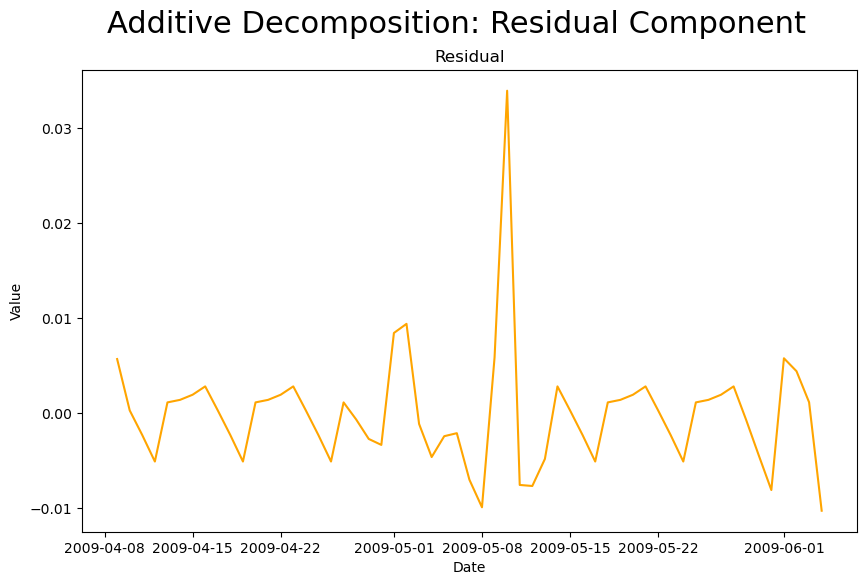

In [30]:
# Plot the residual component with orange color

plt.rcParams.update({'figure.figsize': (10, 6)})
fig, ax = plt.subplots()

# Plot residual component

ax.plot(result_add.resid, color='orange')
ax.set_title('Residual')
ax.set_ylabel('Value')
ax.set_xlabel('Date')

plt.suptitle('Additive Decomposition: Residual Component', fontsize=22)
plt.show()

The plot reveals that the residual values oscillate around zero, suggesting that the unpredictable changes in sentiment center around a neutral point. Sharp spikes, such as the one around early May 2009, suggest sudden and significant changes in sentiment that are not part of a regular pattern. These spikes might correspond to specific events or anomalies that impacted the sentiment scores but do not follow the general trend or seasonal pattern. The overall variability of the residuals highlights the inherent unpredictability of the data, emphasising the importance of considering these random fluctuations in any analysis or forecasting model.

## Sentiment vader score of tweets over a two-month period

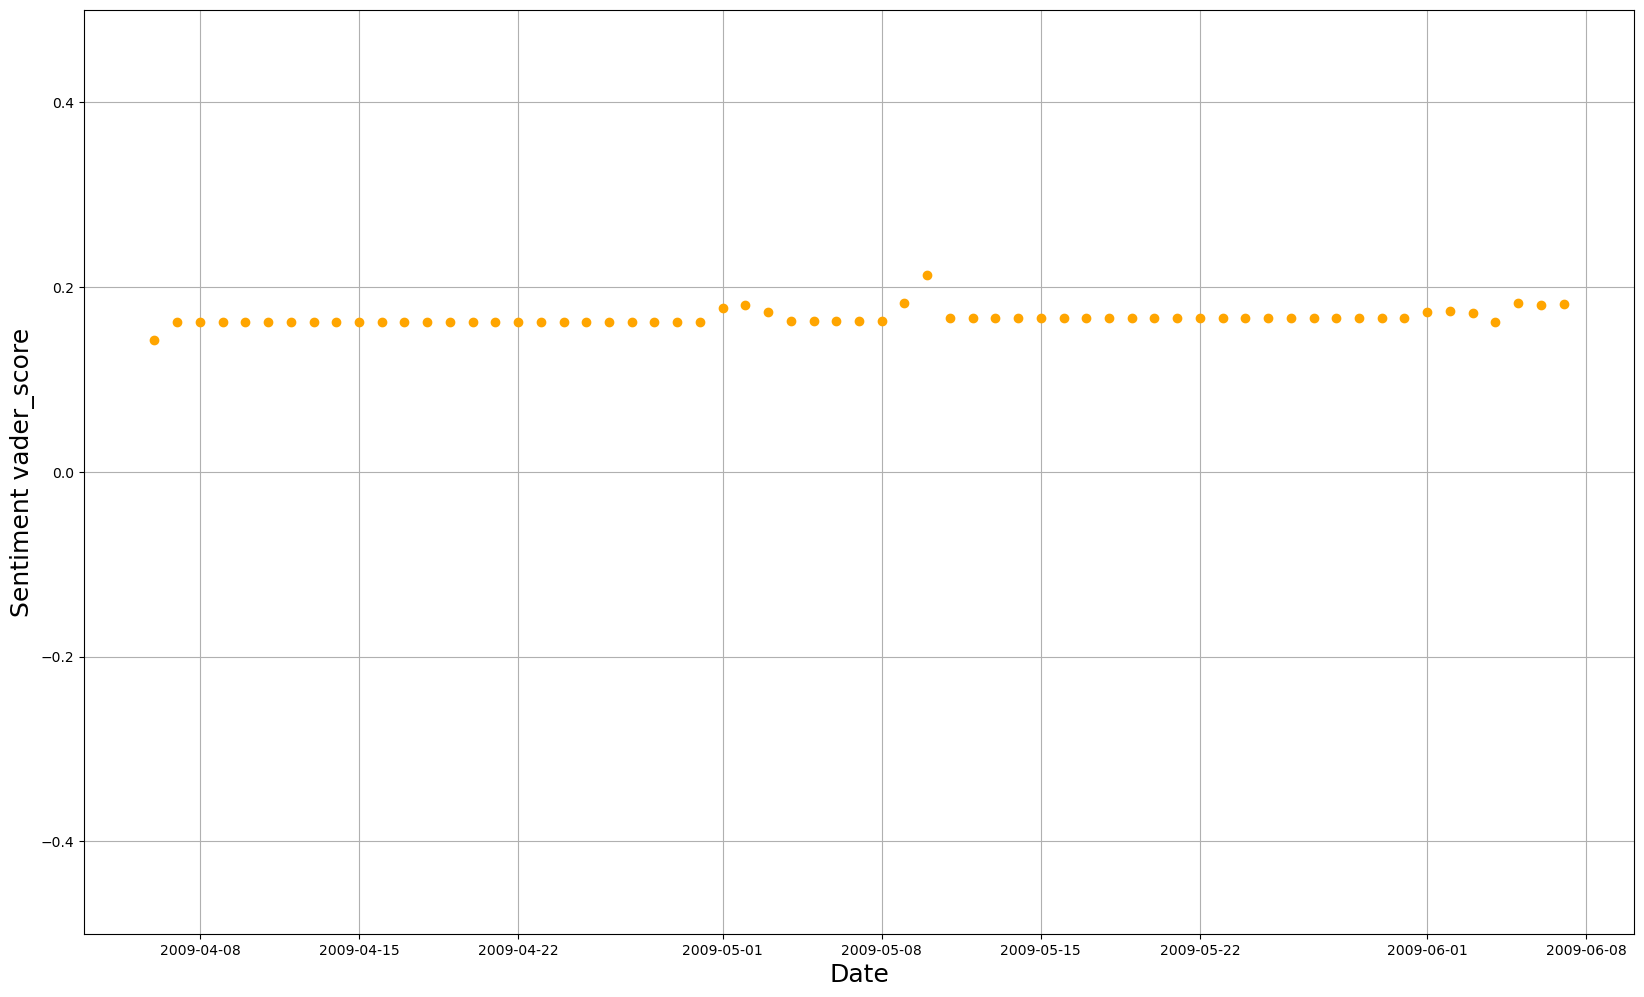

In [31]:
# Resample data by day, computing the mean sentiment score for each day
daily_data = tweets_dataset['vader_score'].resample('D').mean().fillna(method='ffill')

# Plot the daily sentiment scores
fig, ax = plt.subplots(figsize=(20, 12))

# Plot daily data points
ax.plot(daily_data.index, daily_data, linestyle="", marker="o", color="orange")

# Set y-axis limits
plt.ylim([-.5, .5])
plt.grid()

# Set x and y axis labels
plt.xlabel("Date", fontsize=18)
plt.ylabel("Sentiment vader_score", fontsize=18)

# Show the plot
plt.show()

The graph displays the sentiment vader score of tweets over a two-month period, from early April to early June 2009.

Each point represents the average sentiment of tweets on a particular day, plotted on a scale from -0.4 to 0.4.

The data shows that the sentiment scores consistently hover around the 0.2 mark throughout the period, indicating a generally positive sentiment in the tweets.

There are no points below zero, which would suggest negative sentiment, and the scores do not vary widely on different days, suggesting a relatively stable mood among the users during this period.

This stability in sentiment might suggest that there were no major controversial or highly emotional events being discussed extensively on Twitter during these months, or it could reflect a generally positive reception to events occurring at that time.

The consistent positivity could also be influenced by the nature of the content being shared or the demographics of the users active during this period. Understanding these sentiment trends could be useful for businesses and analysts seeking to gauge public reaction to products, services, or events, or for researchers studying patterns of communication on social media.

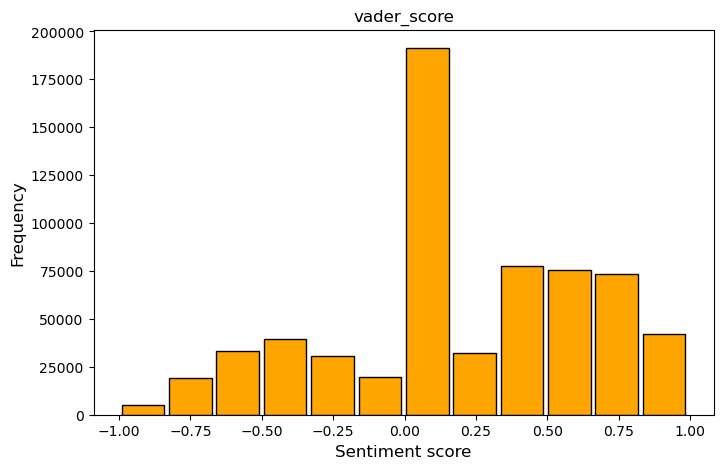

In [32]:
# Drop the "month" and "day" columns if they exist
if 'month' in tweets_dataset.columns and 'day' in tweets_dataset.columns:
    tweets_dataset.drop(["month", "day"], axis=1, inplace=True)

# Plot the histogram of vader_score
ax = tweets_dataset.hist(column='vader_score', edgecolor='black', figsize=(8, 5), color='orange', bins=12, grid=False, sharex=False, rwidth=0.9)

# Set y-axis label
plt.ylabel('Frequency', fontsize=12)

# Set x-axis label
plt.xlabel('Sentiment score', fontsize=12)

# Show the plot
plt.show()

The histogram illustrates the distribution of sentiment scores for a dataset, categorized using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. The sentiment scores are segmented from -1.0 to 1.0, where -1.0 represents extremely negative, 0 is neutral, and 1.0 is extremely positive.

The towering bar at 0 indicates that a substantial portion of the data is classified as neutral, significantly outnumbering the entries in any other sentiment category. This could imply that the majority of the analyzed texts (tweets or other social media posts) either do not convey strong emotions or contain balanced amounts of both positive and negative sentiments, resulting in a neutral overall score.

The bars to the right of the central peak, representing positive sentiment scores, are noticeably higher than those on the negative side. This suggests that among the entries that do convey emotion, positive sentiments are more prevalent than negative ones.

The presence of more moderate positive scores (around 0.25 and 0.5) compared to the relatively fewer entries at high positivity (0.75 and 1.0) suggests that while positive sentiment is common, it is typically not extremely strong. Conversely, the distribution of negative scores shows fewer texts with strongly negative sentiments compared to those mildly negative.

This kind of sentiment distribution analysis is crucial for businesses and organizations to understand public perception, gauge brand sentiment, or analyze customer feedback across various platforms.